In [1]:
import pandas as pd

df = pd.read_csv("../Data/hr_data.csv")
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [3]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
emp_satis_df = pd.read_excel('../Data/employee_satisfaction_evaluation.xlsx')
emp_satis_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [7]:
emp_satis_df.describe()

,EMPLOYEE #,satisfaction_level,last_evaluation
count,14999.000000,14972.000000,14972.000000
mean,45424.627575,0.612830,0.716125
std,25915.900127,0.248714,0.171138
min,1003.000000,0.090000,0.360000
25%,22872.500000,0.440000,0.560000
50%,45448.000000,0.640000,0.720000
75%,67480.500000,0.820000,0.870000
max,99815.000000,1.000000,1.000000


In [8]:
emp_satis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
EMPLOYEE #            14999 non-null int64
satisfaction_level    14972 non-null float64
last_evaluation       14972 non-null float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [9]:
df = df.set_index('employee_id').join(emp_satis_df.set_index('EMPLOYEE #'))
df = df.reset_index()
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [10]:
df[df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [11]:
df.fillna(df.mean(), inplace=True)
df[df['employee_id'] == 22316]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
72,22316,2,149,3,0,1,0,product_mng,high,0.61283,0.716125


In [12]:
df.drop(columns='employee_id', inplace=True)
df.head(3)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88


In [13]:
df.groupby('department').sum().sort_values(by='satisfaction_level', ascending=False)

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
technical,10548,550793,9279,381,697,28,1653.37264,1961.930624
support,8479,447490,7563,345,555,20,1377.90849,1611.534499
IT,4683,248119,4256,164,273,3,758.17283,879.452250
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125


In [14]:
import matplotlib.pyplot as plt

avg_satisfaction = (df.groupby('department')['satisfaction_level'].sum() / 
                    df.groupby('department')['satisfaction_level'].count()).sort_values(ascending=False)
ax = avg_satisfaction.plot(kind='bar', figsize=(15, 6), title="Satisfaction Rates by Deparments", grid=True, ylim=(.5, .64))

In [15]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [16]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

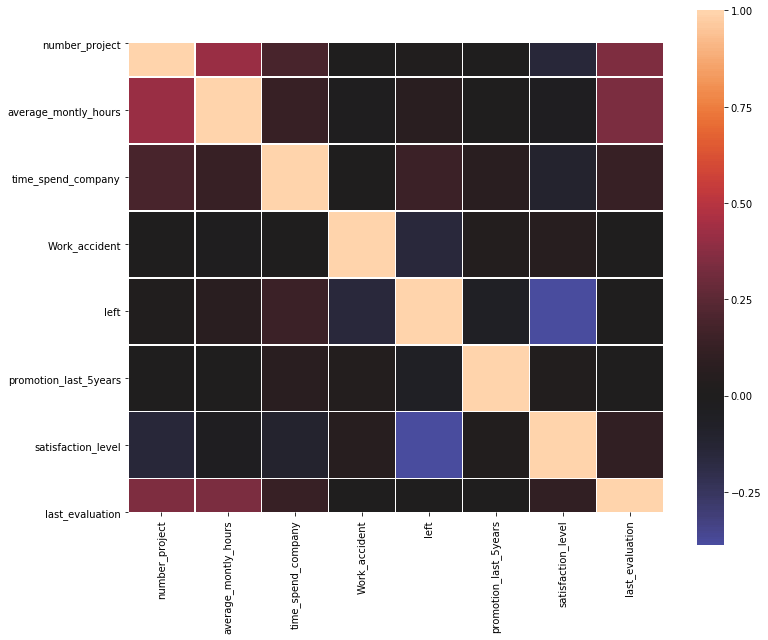

In [17]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, 
            vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.show()

In [18]:
df = pd.get_dummies(df, columns=['department','salary'])
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,...,0,0,0,0,1,0,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,...,0,0,0,0,1,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

x = df.drop(['left'], axis=1)
y = df['left']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
res = model.predict(x_test)

print(confusion_matrix(y_test, res))
print(classification_report(y_test, res))

[[3183  248]
 [ 687  382]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3431
           1       0.61      0.36      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



In [22]:
print("Acc:", (3183 + 382) / (3183 + 382 + 248 + 687))

Acc: 0.7922222222222223


In [23]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

res = random_forest.predict(x_test)
score = random_forest.score(x_test, y_test)

print(confusion_matrix(y_test, res))
print(classification_report(y_test, res))

[[3422    9]
 [  40 1029]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3431
           1       0.99      0.96      0.98      1069

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
print("Acc:", (3418 + 1032) / 4500)

Acc: 0.9888888888888889
